In [53]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# Загружаем набор данных
data = pd.read_csv('databank1.csv', delimiter=';')
data2 = pd.read_csv('databank1.csv', delimiter=';')
data.head()

,Unnamed: 0,CreditSum,sex,age,EducationStatus,kolichestvo_rabotnikov_v_organizacii,Employment,OrgStanding_N,kolichestvo_detej_mladshe_18,Residence,ConfirmedMonthlyIncome (Target)
0,0,500000.0,0,49,4,3,1,1.25,0,1,30691.36
1,1,708000.0,0,44,2,0,3,20.00,0,0,25712.07
2,2,665000.0,1,29,4,2,1,2.00,1,1,31081.26
3,3,458000.0,0,59,5,1,1,23.00,0,0,17848.79
4,4,969000.0,1,51,4,3,1,9.25,2,1,115380.53


In [54]:
data.pop('Unnamed: 0')
data.pop('kolichestvo_rabotnikov_v_organizacii')
data.pop('Employment')
data.pop('EducationStatus')
data.pop('Residence')
data.pop('sex')

# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')

data.head(10505)

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.00,49,1.250000,0,30691.360
1,708000.00,44,20.000000,0,25712.070
2,665000.00,29,2.000000,1,31081.260
3,458000.00,59,23.000000,0,17848.790
4,969000.00,51,9.250000,2,115380.530
5,35000.00,35,5.500000,0,39578.970
6,701000.00,54,1.500000,0,50052.420
7,710000.00,34,9.250000,2,100050.000
8,240000.00,26,3.916666,0,34000.580
9,120400.00,23,3.000000,0,47266.040


In [55]:
kolOb=10505
kolFc=5

In [56]:
X = data.values[:,0:]
X = np.nan_to_num(X)
X

array([[5.000000e+05, 4.900000e+01, 1.250000e+00, 0.000000e+00,
        3.069136e+04],
       [7.080000e+05, 4.400000e+01, 2.000000e+01, 0.000000e+00,
        2.571207e+04],
       [6.650000e+05, 2.900000e+01, 2.000000e+00, 1.000000e+00,
        3.108126e+04],
       ...,
       [6.000000e+05, 3.400000e+01, 9.000000e+00, 1.000000e+00,
        6.486240e+04],
       [3.762500e+05, 2.600000e+01, 5.000000e-01, 0.000000e+00,
        3.132647e+04],
       [1.050000e+05, 3.300000e+01, 1.000000e+01, 1.000000e+00,
        7.117874e+04]])

In [57]:
from yellowbrick.cluster import KElbowVisualizer

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
x_scaled=scaler.fit(data)
x_scaled = scaler.fit_transform(data)
x_scaled

array([[ 0.31946113,  0.9136698 , -0.80127874, -0.74598626, -0.34685629],
       [ 0.99164819,  0.45604642,  1.4505279 , -0.74598626, -0.53033107],
       [ 0.85268644, -0.91682372, -0.71120647,  0.45927146, -0.33248942],
       ...,
       [ 0.64262799, -0.45920034,  0.12946801,  0.45927146,  0.9122638 ],
       [-0.08045785, -1.19139774, -0.891351  , -0.74598626, -0.32345402],
       [-0.95704795, -0.55072501,  0.24956436,  0.45927146,  1.14500564]])

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002E9B19F3DD8>
Exception in Tkinter callback
Traceback (mo

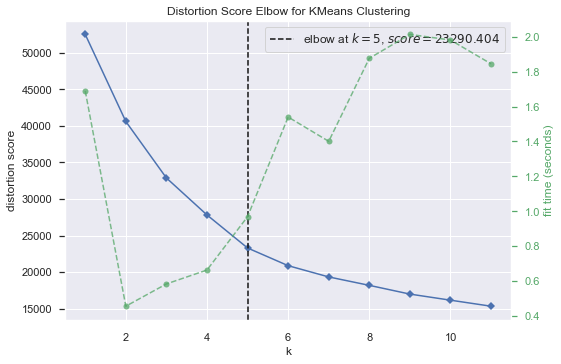

In [60]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()   

In [61]:
# kmeans = KMeans(4)
# kmeans.fit(x_scaled)
# identified_clusters = kmeans.fit_predict(x_scaled)
# data_with_clusters = data.copy()
# data_with_clusters['Cluster'] = identified_clusters
# print(kmeans.cluster_centers_)
# print(identified_clusters)

In [62]:
kolKl=5

[[ 0.10732854  1.06760672  2.08930473 -0.49478149 -0.25261761]
 [-0.34042888 -1.02573077 -0.58133279 -0.49411925 -0.25308482]
 [ 1.75316762  0.08040768 -0.06748156  0.36897528  2.74226089]
 [-0.11568921  1.05365309 -0.25153253 -0.58437105 -0.33605562]
 [ 0.06010376 -0.27680497 -0.11606305  1.25071972  0.11242484]]


,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
cluster_pred,,,,,
0,1377,1377,1377,1377,1377
1,3255,3255,3255,3255,3255
2,614,614,614,614,614
3,2461,2461,2461,2461,2461
4,2798,2798,2798,2798,2798


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002E9B1084B38>
Exception in Tkinter callback
Traceback (mo

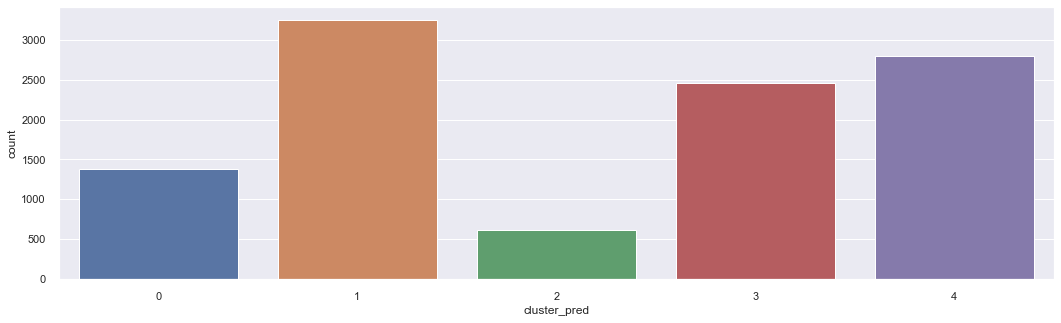

In [63]:
kmeans_scaled = KMeans(kolKl)
# ,random_state=42
kmeans_scaled.fit(x_scaled)
clusters_scaled = data.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
# print(identified_clusters)
sns.set(style="darkgrid")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()
# clusters_scaled.head()

In [64]:
clusters_scaled.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred
0,500000.0,49,1.25,0,30691.36,3
1,708000.0,44,20.00,0,25712.07,0
2,665000.0,29,2.00,1,31081.26,4
3,458000.0,59,23.00,0,17848.79,0
4,969000.0,51,9.25,2,115380.53,2


In [65]:
data2['cluster_pred']=clusters_scaled['cluster_pred']
data2.head()

,Unnamed: 0,CreditSum,sex,age,EducationStatus,kolichestvo_rabotnikov_v_organizacii,Employment,OrgStanding_N,kolichestvo_detej_mladshe_18,Residence,ConfirmedMonthlyIncome (Target),cluster_pred
0,0,500000.0,0,49,4,3,1,1.25,0,1,30691.36,3
1,1,708000.0,0,44,2,0,3,20.00,0,0,25712.07,0
2,2,665000.0,1,29,4,2,1,2.00,1,1,31081.26,4
3,3,458000.0,0,59,5,1,1,23.00,0,0,17848.79,0
4,4,969000.0,1,51,4,3,1,9.25,2,1,115380.53,2


In [66]:
# from scipy import stats
# stats.kruskal(clusters_scaled['Residence'][clusters_scaled['cluster_pred'] == 0],
#                clusters_scaled['Residence'][clusters_scaled['cluster_pred'] == 1],
#                clusters_scaled['Residence'][clusters_scaled['cluster_pred'] == 2],
#                clusters_scaled['Residence'][clusters_scaled['cluster_pred'] == 3],
#                clusters_scaled['Residence'][clusters_scaled['cluster_pred'] == 4])

In [67]:
import matplotlib
matplotlib.use('TkAgg')
import scipy.stats as stats

In [68]:
print (stats.f_oneway(clusters_scaled['cluster_pred'],clusters_scaled['CreditSum']))

F_onewayResult(statistic=17652.654133963013, pvalue=0.0)


In [69]:
print (stats.f_oneway(clusters_scaled['cluster_pred'],clusters_scaled['age']))

F_onewayResult(statistic=117244.88246631202, pvalue=0.0)


In [70]:
print (stats.f_oneway(clusters_scaled['cluster_pred'],clusters_scaled['OrgStanding_N']))

F_onewayResult(statistic=4823.217029316614, pvalue=0.0)


In [71]:
print (stats.f_oneway(clusters_scaled['cluster_pred'],clusters_scaled['kolichestvo_detej_mladshe_18']))

F_onewayResult(statistic=9370.611433121143, pvalue=0.0)


In [72]:
print (stats.f_oneway(clusters_scaled['cluster_pred'],clusters_scaled['ConfirmedMonthlyIncome (Target)']))

F_onewayResult(statistic=22935.81421914234, pvalue=0.0)


In [73]:
import researchpy as rp

In [74]:
rp.summary_cont(clusters_scaled['CreditSum'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CreditSum,10505.0,401146.6904,309452.4029,3019.2274,395228.4314,407064.9494


In [75]:
rp.summary_cont(clusters_scaled['age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,10505.0,39.0172,10.9265,0.1066,38.8083,39.2262


In [76]:
rp.summary_cont(clusters_scaled['ConfirmedMonthlyIncome (Target)'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,ConfirmedMonthlyIncome (Target),10505.0,40104.6322,27140.1169,264.7974,39585.5791,40623.6853


In [87]:
rp.summary_cont(clusters_scaled['kolichestvo_detej_mladshe_18'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,kolichestvo_detej_mladshe_18,10505.0,0.6189,0.8297,0.0081,0.6031,0.6348


In [90]:
rp.summary_cont(clusters_scaled['OrgStanding_N'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,OrgStanding_N,10505.0,7.922,8.327,0.0812,7.7627,8.0812


In [128]:
rp.summary_cont(clusters_scaled['ConfirmedMonthlyIncome (Target)'].groupby(clusters_scaled['cluster_pred']))
# rp.summary_cont(data2['sex'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,33248.8872,15481.4489,417.2003,32430.4697,34067.3046
1,3255,33237.5782,13773.1416,241.4113,32764.2448,33710.9116
2,614,114526.3710,50818.4602,2050.8661,110498.7951,118553.9469
3,2461,30984.4775,15332.1819,309.0638,30378.4253,31590.5296
4,2798,43157.6611,16688.3072,315.4921,42539.0403,43776.2819


In [95]:
rp.summary_cont(data2['CreditSum'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,434358.1827,259705.9946,6998.6617,420628.9814,448087.3840
1,3255,295730.0687,224837.5297,3940.8809,288003.2100,303456.9273
2,614,943642.7998,545374.7375,22009.5332,900419.5664,986866.0332
3,2461,365348.0908,251093.3136,5061.5012,355422.8474,375273.3341
4,2798,419876.7194,259682.7680,4909.2967,410250.5092,429502.9296


In [118]:
data2['cluster_pred']==3

0         True
1        False
2        False
3        False
4        False
5        False
6         True
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15        True
16       False
17       False
18        True
19       False
20       False
21       False
22        True
23       False
24        True
25       False
26       False
27       False
28        True
29       False
         ...  
10475     True
10476    False
10477    False
10478     True
10479     True
10480    False
10481    False
10482     True
10483    False
10484    False
10485    False
10486     True
10487    False
10488     True
10489     True
10490     True
10491     True
10492    False
10493    False
10494    False
10495    False
10496     True
10497    False
10498    False
10499    False
10500    False
10501     True
10502    False
10503    False
10504    False
Name: cluster_pred, Length: 10505, dtype: bool

In [344]:
data2['kolichestvo_detej_mladshe_18'].groupby(data2['cluster_pred']).describe()

,count,mean,std,min,25%,50%,75%,max
cluster_pred,,,,,,,,
0,1377.0,0.208424,0.434004,0.0,0.0,0.0,0.0,2.0
1,3255.0,0.209217,0.406812,0.0,0.0,0.0,0.0,1.0
2,614.0,0.925081,0.935570,0.0,0.0,1.0,2.0,7.0
3,2461.0,0.134092,0.340820,0.0,0.0,0.0,0.0,1.0
4,2798.0,1.656898,0.650245,1.0,1.0,2.0,2.0,7.0


In [79]:
rp.summary_cont(data2['age'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,50.6819,5.7447,0.1548,50.3782,50.9856
1,3255,27.8135,4.5393,0.0796,27.6575,27.9695
2,614,39.8958,8.2771,0.3340,39.2398,40.5518
3,2461,50.5295,5.5830,0.1125,50.3088,50.7501
4,2798,35.9918,5.1694,0.0977,35.8002,36.1834


In [80]:
rp.summary_cont(data2['OrgStanding_N'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,25.3189,6.4725,0.1744,24.9767,25.6610
1,3255,3.0808,2.7083,0.0475,2.9877,3.1738
2,614,7.3601,5.9384,0.2397,6.8894,7.8307
3,2461,5.8275,4.2562,0.0858,5.6593,5.9958
4,2798,6.9577,5.1443,0.0973,6.7670,7.1484


In [81]:
rp.summary_cont(data2['kolichestvo_detej_mladshe_18'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,0.2084,0.4340,0.0117,0.1855,0.2314
1,3255,0.2092,0.4068,0.0071,0.1952,0.2232
2,614,0.9251,0.9356,0.0378,0.8509,0.9992
3,2461,0.1341,0.3408,0.0069,0.1206,0.1476
4,2798,1.6569,0.6502,0.0123,1.6328,1.6810


In [82]:
rp.summary_cont(data2['sex'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,0.2752,0.4468,0.0120,0.2516,0.2989
1,3255,0.5862,0.4926,0.0086,0.5692,0.6031
2,614,0.6889,0.4633,0.0187,0.6522,0.7256
3,2461,0.4563,0.4982,0.0100,0.4366,0.4760
4,2798,0.6101,0.4878,0.0092,0.5920,0.6282


In [83]:
rp.summary_cont(data2['EducationStatus'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,2.8780,1.1100,0.0299,2.8193,2.9367
1,3255,3.0243,1.0918,0.0191,2.9867,3.0618
2,614,3.7541,0.8056,0.0325,3.6902,3.8179
3,2461,2.7119,1.1657,0.0235,2.6658,2.7580
4,2798,3.2348,1.0912,0.0206,3.1944,3.2753


In [84]:
rp.summary_cont(data2['kolichestvo_rabotnikov_v_organizacii'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,1.9412,0.9943,0.0268,1.8886,1.9937
1,3255,2.1800,0.9961,0.0175,2.1458,2.2143
2,614,2.0896,1.0732,0.0433,2.0045,2.1746
3,2461,1.7859,1.0496,0.0212,1.7444,1.8273
4,2798,2.0461,1.0482,0.0198,2.0072,2.0850


In [85]:
rp.summary_cont(data2['Employment'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,1.4858,0.8859,0.0239,1.4390,1.5327
1,3255,1.3253,0.7212,0.0126,1.3006,1.3501
2,614,2.6808,1.1519,0.0465,2.5895,2.7721
3,2461,1.5437,0.9829,0.0198,1.5048,1.5825
4,2798,1.6744,1.0063,0.0190,1.6371,1.7117


In [86]:
rp.summary_cont(data2['Residence'].groupby(data2['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,1377,0.5832,0.4932,0.0133,0.5571,0.6092
1,3255,0.7487,0.4338,0.0076,0.7338,0.7636
2,614,0.8697,0.3369,0.0136,0.8430,0.8964
3,2461,0.6396,0.4802,0.0097,0.6206,0.6586
4,2798,0.6405,0.4800,0.0091,0.6227,0.6582


In [45]:
B=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
# for i in range(5): 
#     for j in range(5): 
#             B[i][j] = 0 
print(B[2][1])

0


In [46]:
print(B)
for v in range(0,kolOb):
    l = data2['cluster_pred'][v]
    m = data2['Employment'][v]
    B[l][m] = B[l][m]+1
print(B)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[[1, 1015, 110, 193, 58], [1, 1829, 236, 544, 188], [0, 2623, 267, 303, 62], [0, 1819, 133, 322, 187], [1, 157, 59, 217, 180]]


In [47]:
B=[[0,0],[0,0],[0,0],[0,0],[0,0]]
print(B)
for v in range(0,kolOb):
    l = data2['cluster_pred'][v]
    m = data2['sex'][v]
    B[l][m] = B[l][m]+1
print(B)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[998, 379], [1091, 1707], [1347, 1908], [1338, 1123], [191, 423]]


In [48]:
B=[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]
print(B)
for v in range(0,kolOb):
    l = data2['cluster_pred'][v]
    m = data2['EducationStatus'][v]
    B[l][m] = B[l][m]+1
print(B)

[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
[[1, 93, 637, 7, 621, 17, 1], [5, 164, 819, 62, 1679, 67, 2], [13, 219, 1118, 278, 1581, 45, 1], [4, 317, 1108, 27, 970, 30, 5], [0, 10, 73, 11, 487, 30, 3]]


In [49]:
B=[[0,0],[0,0],[0,0],[0,0],[0,0]]
print(B)
for v in range(0,kolOb):
    l = data2['cluster_pred'][v]
    m = data2['Residence'][v]
    B[l][m] = B[l][m]+1
print(B)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[574, 803], [1006, 1792], [818, 2437], [887, 1574], [80, 534]]


In [50]:
B=[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
print(B)
for v in range(0,kolOb):
    l = data2['cluster_pred'][v]
    m = data2['kolichestvo_rabotnikov_v_organizacii'][v]
    B[l][m] = B[l][m]+1
print(B)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[103, 414, 321, 539], [266, 677, 517, 1338], [235, 669, 626, 1725], [301, 772, 541, 847], [72, 112, 119, 311]]


In [19]:
# rp.summary_cont(clusters_scaled['sex'].groupby(clusters_scaled['cluster_pred']))

In [20]:
# rp.summary_cont(clusters_scaled['Residence'].groupby(clusters_scaled['cluster_pred']))

In [21]:
# дисперсионный анализ
import matplotlib
matplotlib.use('TkAgg')
import scipy.stats as stats

In [44]:
stats.f_oneway(clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=747.2988121630914, pvalue=0.0)

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred,1.251188e+14,1.0,1492.045734,2.467235e-305
Residual,8.807525e+14,10503.0,NaN,NaN


In [23]:
bins = [-1, 0, 1, 2, 3, 10]
# bins = [-1, 0, 1, 2, 10]
labels = ['Нулевой', 'Первый','Второй','Третий','Четвертый']
# labels = ['Нулевой', 'Первый','Второй','Третий']

clusters_scaled['cluster_pred_cat'] = pd.cut(clusters_scaled['cluster_pred'], bins=bins, labels=labels)

In [24]:
clusters_scaled.head()

,CreditSum,age,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred,cluster_pred_cat
0,500000.0,49,0,30691.36,1,Первый
1,708000.0,44,0,25712.07,1,Первый
2,665000.0,29,1,31081.26,2,Второй
3,458000.0,59,0,17848.79,1,Первый
4,969000.0,51,2,115380.53,0,Нулевой


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
cluster_pred_cat,3.240048e+14,4.0,1114.994724,0.0
Residual,7.628678e+14,10501.0,NaN,NaN


In [26]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
cluster_pred_cat,3.240048e+14,4.0,8.100119e+13,1114.994724,0.0,0.298107,0.29782
Residual,7.628678e+14,10501.0,7.264715e+10,NaN,NaN,NaN,NaN


In [27]:
# fig = plt.figure(figsize= (10, 10))
# ax = fig.add_subplot(111)

# # ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
# ax.set

# data = [clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 0],
#         clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 1],
#         clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 2],
#         clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 3],
#         clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 4]]

# ax.boxplot(data,
#            labels= ['0', '1', '2', '3', '4'],
# #            labels= ['0', '1', '2', '3'],
#            showmeans= True)

# plt.xlabel("Clusters")
# plt.ylabel("lll")

# plt.show()


In [45]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,649827.8148,0.001,616938.0427,682717.5869,True
0,2,138615.458,0.001,114712.6371,162518.2788,True
0,3,69482.7579,0.001,49639.6813,89325.8346,True
0,4,128464.8906,0.001,109236.3569,147693.4243,True
1,2,-511212.3568,0.001,-547480.3717,-474944.3419,True
1,3,-580345.0568,0.001,-614075.9292,-546614.1845,True
1,4,-521362.9242,0.001,-554735.9757,-487989.8726,True
2,3,-69132.7,0.001,-94180.2445,-44085.1555,True
2,4,-10150.5673,0.7655,-34714.1238,14412.9891,False
3,4,58982.1327,0.001,38347.9099,79616.3554,True


In [50]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl
# a1

group1,group2,stat,pval,pval_corr,reject
0,1,-49.3013,0.0,0.0,True
0,2,-18.3493,0.0,0.0,True
0,3,-11.0434,0.0,0.0,True
0,4,-20.6066,0.0,0.0,True
1,2,28.2341,0.0,0.0,True
1,3,38.7096,0.0,0.0,True
1,4,35.1731,0.0,0.0,True
2,3,8.0869,0.0,0.0,True
2,4,1.1829,0.2369,1.0,False
3,4,-8.3162,0.0,0.0,True


In [51]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
0,1,-49.3013,0.0,0.0,True
0,2,-18.3493,0.0,0.0,True
0,3,-11.0434,0.0,0.0,True
0,4,-20.6066,0.0,0.0,True
1,2,28.2341,0.0,0.0,True
1,3,38.7096,0.0,0.0,True
1,4,35.1731,0.0,0.0,True
2,3,8.0869,0.0,0.0,True
2,4,1.1829,0.2369,0.933,False
3,4,-8.3162,0.0,0.0,True


In [31]:
from scipy import stats
f_value, p_value = stats.f_oneway(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
p_value

0.0

In [52]:
import math
from math import sqrt

In [59]:
# кол-во элементов в каждом кластере
N = [0,0,0,0,0]
for l in range(0,kolKl):
    N[l] = clusters_scaled.groupby(['cluster_pred'])['CreditSum'].count()[l]
    print(N[l])

3287
608
1379
2468
2763


In [60]:
# общий центр (координаты)
obcentrx = [0,0,0,0,0,0,0,0,0,0]
# j - номер признака
for j in range(0,kolFc):
    for l in range(0,kolKl):
        obcentrx[j] = obcentrx[j]+N[l]*kmeans_scaled.cluster_centers_[l][j]
    obcentrx[j]=obcentrx[j]/kolOb
    print(obcentrx[j])

7.61139130027461e-05
-0.00018140372352037977
6.998962328299088e-05
0.0005173762073315345
0.00012293871252459337


In [61]:
# вычисляем евклидово расстояние от центра кластера до общего центра
d=[0,0,0,0,0,0,0,0,0,0]
d2=[0,0,0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    for j in range(0,kolFc):
        d2[l] = d2[l]+(kmeans_scaled.cluster_centers_[l][j]-obcentrx[j])**2 
        d[l] = math.sqrt(d2[l])
    print(d[l])
    print(d2[l])

1.339046928532918
1.7930466768134419
3.290709042651016
10.828766003385168
2.4116199387100545
5.815910728783887
1.2779437138227099
1.63314013569898
1.305145502203113
1.703404781921016


In [62]:
# средневзвешенный разброс от центра кластера до общего центра (межкластерное расстояние)
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*d[l]
    k2=k2+N[l]*d2[l]
k=k/kolOb
k2=k2/kolOb
print (k)
print (k2)
SSM=k2

1.5695292104523877
2.7829483407034554


In [63]:
# средний разброс в каждом кластере от объектов до центра кластера
s1=[0,0,0,0,0,0,0,0,0,0]
s2=[0,0,0,0,0,0,0,0,0,0]
a1=[0,0,0,0,0]
for i in range(0, kolOb):
    #dd - расстояние от i-го объекта до центра его кластера
    dd=0
    dd2=0
    l=clusters_scaled['cluster_pred'][i]
    a1[l]=a1[l]+1
    for j in range(0,kolFc):
        dd2=dd2+(x_scaled[i][j]-kmeans_scaled.cluster_centers_[l][j])**2
    dd= math.sqrt(dd2)   
    s1[l] = s1[l]+ dd
    s2[l]=s2[l]+dd2
for l in range(0, kolKl):
    s1[l]=s1[l]/a1[l]
    s2[l]=s2[l]/a1[l]
    print(a1[l])
    print(s1[l])
    print(s2[l])

3287
1.0769158164734884
1.310067905827226
608
2.6985307427263585
8.985442078351571
1379
1.38861116334294
2.18538007627308
2468
1.2204817647810897
1.6714789360170286
2763
1.4418327448739021
2.3098030691058478


In [64]:
# средний внутрикластерный разброс по всем кластерам
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*s1[l]
    k2=k2+N[l]*s2[l]
k=k/kolOb
k2=k2/kolOb
print (k)
print (k2)
SSV=k2

1.3413952064866461
2.2170563550025615


In [65]:
# средний разброс от объектов до общего центра 
s2=0
s4=0
for i in range(0, kolOb):
    #dd - расстояние от i-го объекта до общего центра
    dd=0
    dd2=0
    for j in range(0,kolFc):
        dd2=dd2+(x_scaled[i][j]-obcentrx[j])**2
    dd= math.sqrt(dd2)   
    s2 = s2+dd
    s4 = s4+dd2
s2=s2/kolOb
s4=s4/kolOb
print(s2)
print(s4)
SS=s4

2.0435651984554353
5.000000326391251


In [66]:
# доля межгруппового разброса в общем разбросе
dol=SSM/SS
dol

0.5565896318074939

In [67]:
# 0.43834874998600754
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('EducationStatus')

In [43]:
# 0.4887175174775896
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')

In [44]:
# 0.4149067683431561
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')

In [ ]:
# 0.39084126692105237
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('EducationStatus')
# data.pop('Residence')

In [37]:
# 0.41519816363364503
# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')

In [40]:
# 0.3738374416753147
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('Residence')

In [ ]:
# 0.48495431259108346
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')
# data.pop('kolichestvo_detej_mladshe_18')

In [331]:
datamean=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
datamean

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [332]:
for i in range(0,5):
    datamean[i][0]=data2['CreditSum'].groupby(data2['cluster_pred']).describe()['mean'][i]
    datamean[i][1]=data2['age'].groupby(data2['cluster_pred']).describe()['mean'][i]
    datamean[i][2]=data2['OrgStanding_N'].groupby(data2['cluster_pred']).describe()['mean'][i]
    datamean[i][3]=data2['kolichestvo_detej_mladshe_18'].groupby(data2['cluster_pred']).describe()['mean'][i]
    datamean[i][4]=data2['ConfirmedMonthlyIncome (Target)'].groupby(data2['cluster_pred']).describe()['mean'][i]
datamean

[[434358.18270152493,
  50.68191721132898,
  25.31886943500359,
  0.2084241103848947,
  33248.887155410244],
 [295730.0686513057,
  27.81351766513057,
  3.080772943778767,
  0.20921658986175115,
  33237.57821812598],
 [943642.7997882735,
  39.8957654723127,
  7.36007036644952,
  0.9250814332247557,
  114526.37099348531],
 [365348.0907761073,
  50.52945956928078,
  5.827542840308788,
  0.1340918325883787,
  30984.47746363274],
 [419876.719417441,
  35.99177984274482,
  6.957677934596108,
  1.6568977841315224,
  43157.66108649031]]

In [333]:
datamean = pd.DataFrame(datamean, columns=['CreditSum', 'age', 'OrgStanding_N', 'kolichestvo_detej_mladshe_18', 'ConfirmedMonthlyIncome (Target)'])   

In [334]:
datamean

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,434358.182702,50.681917,25.318869,0.208424,33248.887155
1,295730.068651,27.813518,3.080773,0.209217,33237.578218
2,943642.799788,39.895765,7.360070,0.925081,114526.370993
3,365348.090776,50.529460,5.827543,0.134092,30984.477464
4,419876.719417,35.991780,6.957678,1.656898,43157.661086


In [335]:
stscaler = StandardScaler().fit(datamean)
datamean = stscaler.transform(datamean)
datamean

array([[-0.24850524,  1.10573531,  1.96430968, -0.70865802, -0.5552397 ],
       [-0.84833145, -1.50126312, -0.8340783 , -0.70731551, -0.55559282],
       [ 1.9551045 , -0.1238864 , -0.29558192,  0.50540561,  1.98261949],
       [-0.54710313,  1.08835513, -0.48843146, -0.83458168, -0.62594505],
       [-0.31116469, -0.56894091, -0.346218  ,  1.74514961, -0.24584192]])

In [336]:
# from sklearn import preprocessing
# datamean = preprocessing.normalize(datamean)
# datamean

In [337]:
# scaler = preprocessing.MinMaxScaler()
# names = datamean.columns
# d = scaler.fit_transform(datamean)
# scaled_df = pd.DataFrame(d, columns=names)
# scaled_df.head()
# datamean = scaled_df.to_numpy()
# datamean

In [390]:
# dataKl = [['Кл.1',434358.18270152493,50.68191721132898,25.31886943500359,0.2084241103848947,33248.887155410244],
#           ['Кл.2',295730.0686513057,27.81351766513057,3.080772943778767,0.20921658986175115,33237.57821812598],
#           ['Кл.3',943642.7997882735,39.8957654723127,7.36007036644952,0.9250814332247557,114526.37099348531],
#           ['Кл.4',365348.0907761073,50.52945956928078,5.827542840308788,0.1340918325883787,30984.47746363274],
#           ['Кл.5',419876.719417441,35.99177984274482,6.957677934596108,1.6568977841315224,43157.66108649031]]
# dataKl = pd.DataFrame(dataKl, columns=['ClustNumb','CreditSum', 'age', 'OrgStanding_N', 'kolichestvo_detej_mladshe_18', 'ConfirmedMonthlyIncome (Target)']) 
# dataKl

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002E9C0306438>
Exception in Tkinter callback
Traceback (mo

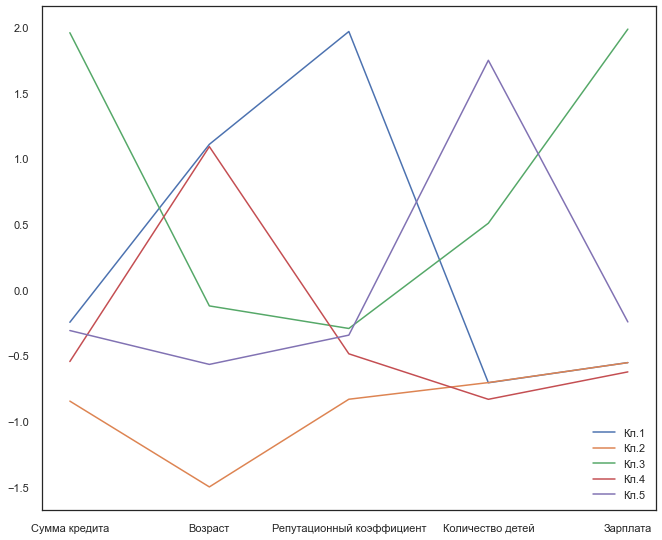

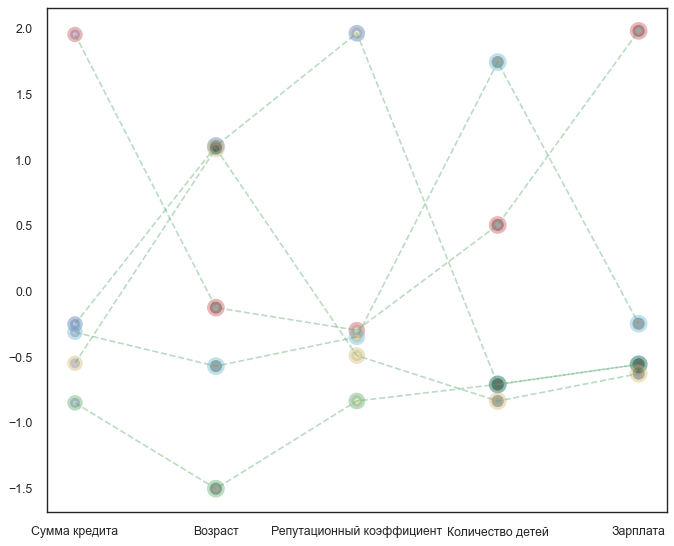

In [430]:
import matplotlib.colors as mcolors
bc = mcolors.BASE_COLORS
num_set = np.random.randint(2, len(mcolors.BASE_COLORS), len(x))
sizes = num_set * 20
colors = [list(bc.keys())[i] for i in num_set]
fig, ax = plt.subplots(figsize=(11, 10))
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')


x = ['Сумма кредита', 'Возраст', 'Репутационный коэффициент', 'Количество детей', 'Зарплата']
y = [[datamean[0][0]], [datamean[0][1]], [datamean[0][2]], [datamean[0][3]], [datamean[0][4]]]
plt.scatter(x, y, s=sizes, alpha=0.4, c=colors, linewidths=5, edgecolors="b")

x1 = ['Сумма кредита', 'Возраст', 'Репутационный коэффициент', 'Количество детей', 'Зарплата']
y1 = [[datamean[1][0]], [datamean[1][1]], [datamean[1][2]], [datamean[1][3]], [datamean[1][4]]]
plt.scatter(x1, y1, s=sizes, alpha=0.4, c=colors, linewidths=5, edgecolors="g")

x2 = ['Сумма кредита', 'Возраст', 'Репутационный коэффициент', 'Количество детей', 'Зарплата']
y2 = [[datamean[2][0]], [datamean[2][1]], [datamean[2][2]], [datamean[2][3]], [datamean[2][4]]]
plt.scatter(x2, y2, s=sizes, alpha=0.4, c=colors, linewidths=5, edgecolors="r")

x3 = ['Сумма кредита', 'Возраст', 'Репутационный коэффициент', 'Количество детей', 'Зарплата']
y3 = [[datamean[3][0]], [datamean[3][1]], [datamean[3][2]], [datamean[3][3]], [datamean[3][4]]]
plt.scatter(x3, y3, s=sizes, alpha=0.4, c=colors, linewidths=5, edgecolors="y")

x4 = ['Сумма кредита', 'Возраст', 'Репутационный коэффициент', 'Количество детей', 'Зарплата']
y4 = [[datamean[4][0]], [datamean[4][1]], [datamean[4][2]], [datamean[4][3]], [datamean[4][4]]]
plt.scatter(x4, y4, s=sizes, alpha=0.4, c=colors, linewidths=5, edgecolors="c")

plt.plot(x, y, "g--", alpha=0.4)
plt.plot(x1, y1, "g--", alpha=0.4)
plt.plot(x2, y2, "g--", alpha=0.4)
plt.plot(x3, y3, "g--", alpha=0.4)
plt.plot(x4, y4, "g--", alpha=0.4)
ax.plot(x, y, label = 'Кл.1')
ax.plot(x1, y1, label = 'Кл.2')
ax.plot(x2, y2, label = 'Кл.3')
ax.plot(x3, y3, label = 'Кл.4')
ax.plot(x4, y4, label = 'Кл.5')
ax.legend()